In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
os.chdir('/content/drive/MyDrive/Master Thesis/src')
from mnist_utils import load_and_transform_mnist, transform_labels_to_binary
from trainers import *
from plots import *

In [4]:
os.chdir('/content/drive/MyDrive/Master Thesis')

MNIST_PATH = '/content/drive/MyDrive/datasets'
RESULTS_PATH = os.path.join(os.path.join(os.getcwd(), "results"), "layers=3 tanh + L2 classes=[6,8]")

In [5]:
new_dim = 10
keep_classes = [6,8]

criterion = nn.BCELoss()

def get_net():
    return nn.Sequential(
        nn.Linear(new_dim,5),
        nn.Tanh(),
        nn.Linear(5,5),
        nn.Tanh(),
        nn.Linear(5,1),
        nn.Sigmoid()
    )

def get_dataset():
    dataset = load_and_transform_mnist(MNIST_PATH, new_dim, keep_classes)
    # the following needed specifically for BCELoss
    dataset["train_targets"] = dataset["train_targets"][..., None].float()
    dataset["test_targets"] = dataset["test_targets"][..., None].float()
    return dataset

# Cubic Newton (M_min = 1e-2)

In [ ]:
CN_trainer = {}
for M_min in [1e-2]:
    CN_trainer[M_min] = {}

In [33]:
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    seed = 0
    max_iters = 200
    print_every = 20
    eval_every = 1
    eval_hessian_every = 1
    save_spectrum_every = None
    save_hessian_every = None
    save_every = max_iters
    # kwargs
    M = 1.0
    M_min = 1e-2

    model_dir = os.path.join(os.path.join(RESULTS_PATH, "CN"), f"seed={seed} M_min={M_min} weight_decay={weight_decay}")
    print(f"model_dir: {model_dir}")

    torch.manual_seed(seed)
    CN_trainer[M_min][weight_decay] = AdaptiveCubicNewtonTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, M,  M_min)
    CN_trainer[M_min][weight_decay].load()
    print_training_stats(CN_trainer[M_min][weight_decay], print_every)
    #_ = CN_trainer[M_min][weight_decay].train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh + L2 classes=[6,8]/CN/seed=0 M_min=0.01 weight_decay=0
     0: train loss =  0.677507, test loss =  0.682647, M =   1.00000000, time =    0.00 sec, lambda_n = -1.101317
    20: train loss =  0.016609, test loss =  0.021539, M =   0.01000000, time =    3.46 sec, lambda_n = -0.001074
    40: train loss =  0.013804, test loss =  0.026013, M =   0.01000000, time =    6.80 sec, lambda_n = -0.000125
    60: train loss =  0.012438, test loss =  0.029487, M =   0.01000000, time =   10.09 sec, lambda_n = -0.000044
    80: train loss =  0.011638, test loss =  0.033165, M =   0.01000000, time =   13.44 sec, lambda_n = -0.000121
   100: train loss =  0.010995, test loss =  0.034522, M =   0.01000000, time =   16.76 sec, lambda_n = -0.000025
   120: train loss =  0.010550, test loss =  0.039110, M =   0.01000000, time =   20.16 sec, lambda_n = -0.000157
   140: train loss =  0.010159, test loss =  0.043893, M =   0.01000000, time

In [34]:
print_test_accuracy(CN_trainer[M_min][0])

Best test accuracy: 99.33%
Last test accuracy: 98.81%


In [35]:
print_test_accuracy(CN_trainer[M_min][1e-5])

Best test accuracy: 99.28%
Last test accuracy: 98.96%


In [36]:
print_test_accuracy(CN_trainer[M_min][3e-5])

Best test accuracy: 99.33%
Last test accuracy: 98.81%


In [37]:
print_test_accuracy(CN_trainer[M_min][1e-4])

Best test accuracy: 99.22%
Last test accuracy: 99.12%


## plots

In [27]:
metrics = []
hessian_metrics = []
labels = []

M_min = 1e-2
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    metrics.append(get_metrics(CN_trainer[M_min][weight_decay]))
    hessian_metrics.append(get_hessian_metrics(CN_trainer[M_min][weight_decay]))
    labels.append(f"weight_decay={weight_decay}")

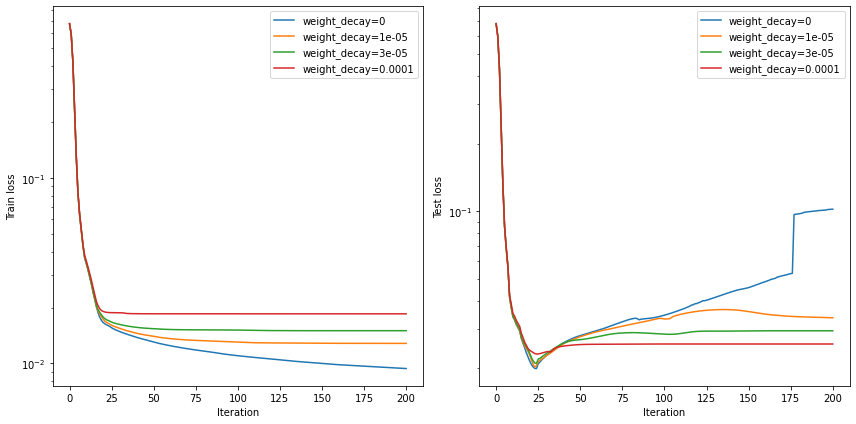

In [28]:
plot_losses(metrics, labels)

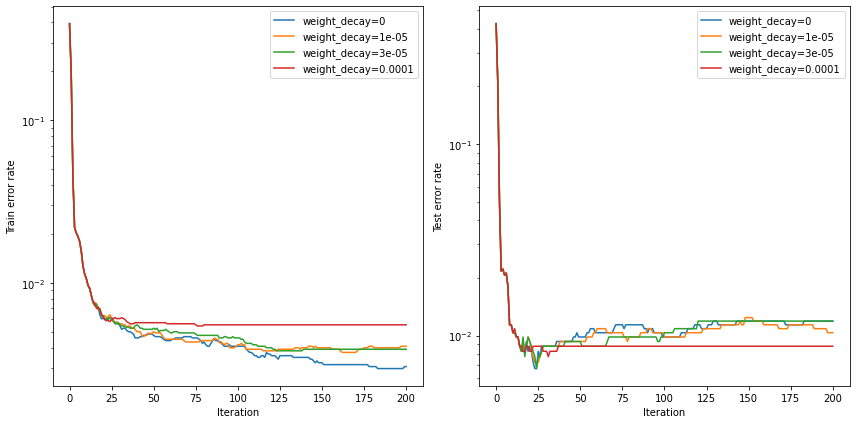

In [29]:
plot_errors(metrics, labels)

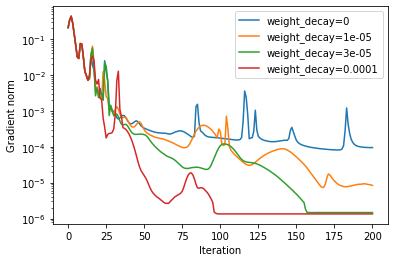

In [30]:
plot_grad_norms(metrics, labels)

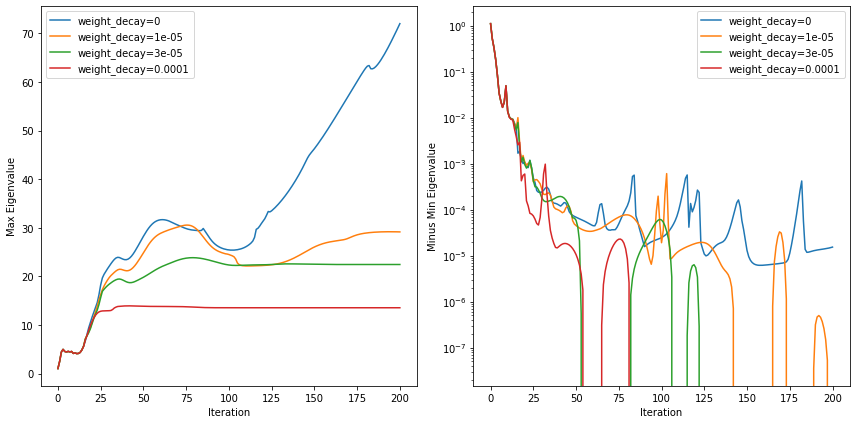

In [31]:
plot_max_min_eigvals(hessian_metrics, labels)

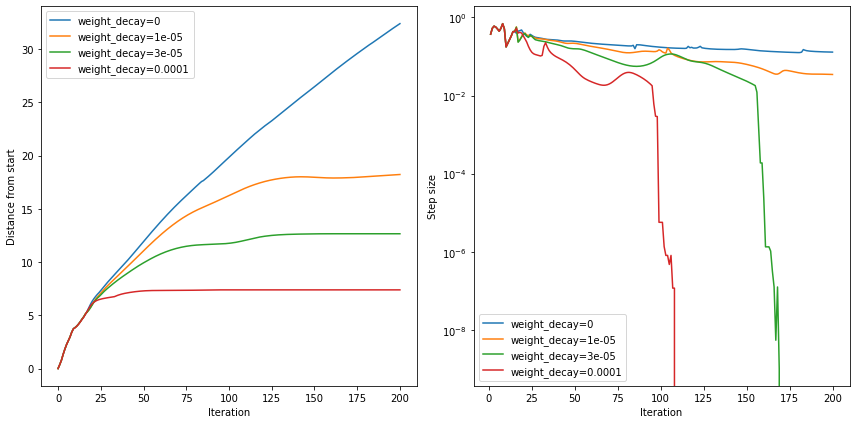

In [32]:
plot_distances(metrics, labels)

# Cubic Newton (M_min = 1e-1)

In [39]:
CN_trainer = {}
for M_min in [1e-1]:
    CN_trainer[M_min] = {}

In [42]:
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    seed = 0
    max_iters = 200
    print_every = 20
    eval_every = 1
    eval_hessian_every = 1
    save_spectrum_every = None
    save_hessian_every = None
    save_every = max_iters
    # kwargs
    M = 1.0
    M_min = 1e-1

    model_dir = os.path.join(os.path.join(RESULTS_PATH, "CN"), f"seed={seed} M_min={M_min} weight_decay={weight_decay}")
    print(f"model_dir: {model_dir}")

    torch.manual_seed(seed)
    CN_trainer[M_min][weight_decay] = AdaptiveCubicNewtonTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, M,  M_min)
    CN_trainer[M_min][weight_decay].load()
    print_training_stats(CN_trainer[M_min][weight_decay], print_every)
    #_ = CN_trainer[M_min][weight_decay].train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh + L2 classes=[6,8]/CN/seed=0 M_min=0.1 weight_decay=0
     0: train loss =  0.677507, test loss =  0.682647, M =   1.00000000, time =    0.00 sec, lambda_n = -1.101317
    20: train loss =  0.016209, test loss =  0.020563, M =   0.10000000, time =    3.60 sec, lambda_n = -0.000232
    40: train loss =  0.014706, test loss =  0.018089, M =   0.10000000, time =    6.87 sec, lambda_n = -0.000272
    60: train loss =  0.014198, test loss =  0.018455, M =   0.10000000, time =   10.19 sec, lambda_n = -0.000173
    80: train loss =  0.013678, test loss =  0.019800, M =   0.10000000, time =   13.52 sec, lambda_n = -0.000280
   100: train loss =  0.013150, test loss =  0.020746, M =   0.10000000, time =   16.83 sec, lambda_n = -0.000107
   120: train loss =  0.012797, test loss =  0.021799, M =   0.10000000, time =   20.14 sec, lambda_n = -0.000119
   140: train loss =  0.012447, test loss =  0.022747, M =   0.10000000, time 

In [49]:
print_test_accuracy(CN_trainer[M_min][0])

Best test accuracy: 99.53%
Last test accuracy: 99.22%


In [50]:
print_test_accuracy(CN_trainer[M_min][1e-5])

Best test accuracy: 99.53%
Last test accuracy: 99.28%


In [51]:
print_test_accuracy(CN_trainer[M_min][3e-5])

Best test accuracy: 99.53%
Last test accuracy: 99.07%


In [52]:
print_test_accuracy(CN_trainer[M_min][1e-4])

Best test accuracy: 99.48%
Last test accuracy: 99.28%


## plots

In [43]:
metrics = []
hessian_metrics = []
labels = []

M_min = 1e-1
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    metrics.append(get_metrics(CN_trainer[M_min][weight_decay]))
    hessian_metrics.append(get_hessian_metrics(CN_trainer[M_min][weight_decay]))
    labels.append(f"weight_decay={weight_decay}")

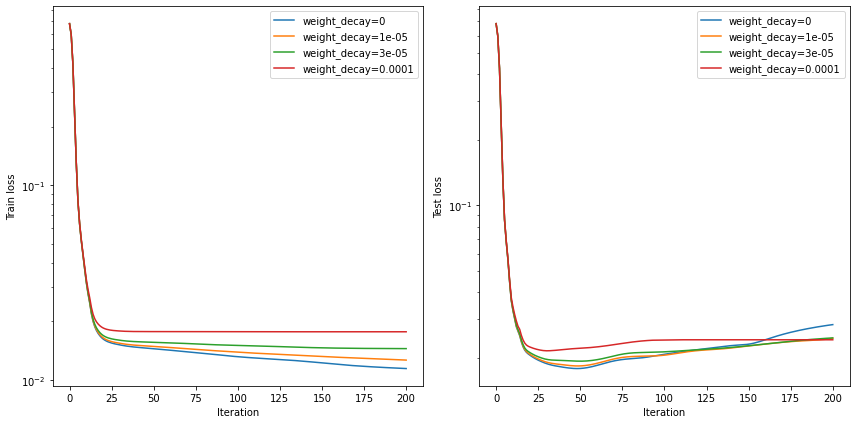

In [44]:
plot_losses(metrics, labels)

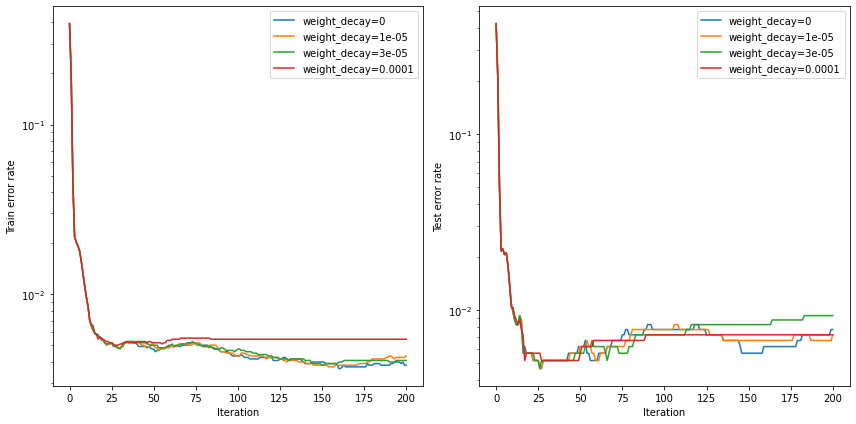

In [45]:
plot_errors(metrics, labels)

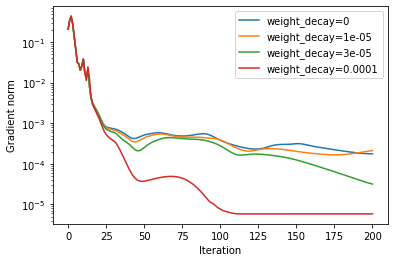

In [46]:
plot_grad_norms(metrics, labels)

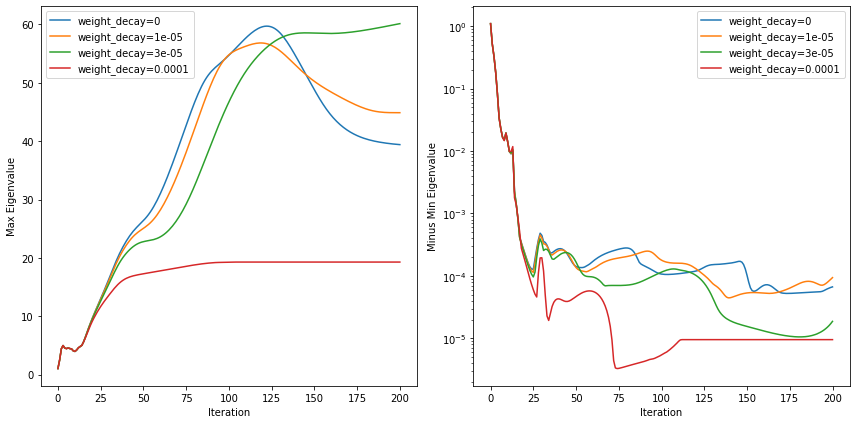

In [47]:
plot_max_min_eigvals(hessian_metrics, labels)

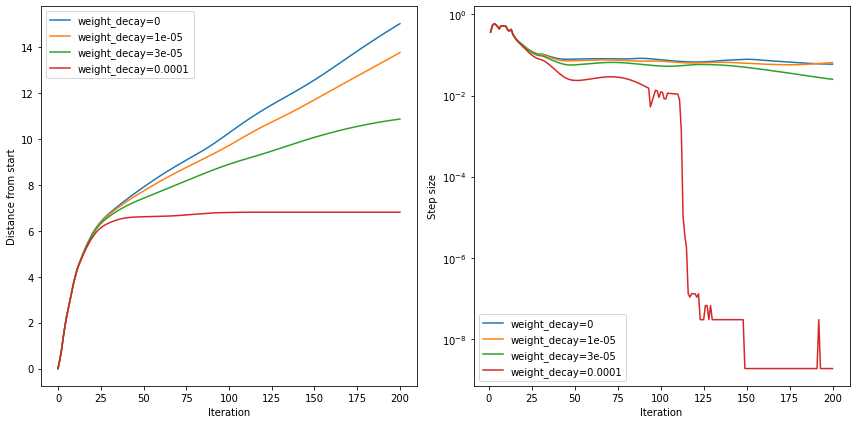

In [48]:
plot_distances(metrics, labels)

# Cubic Newton (M_min = 3e-1)

In [53]:
CN_trainer = {}
for M_min in [3e-1]:
    CN_trainer[M_min] = {}

In [58]:
#for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    seed = 0
    max_iters = 200
    print_every = 20
    eval_every = 1
    eval_hessian_every = 1
    save_spectrum_every = None
    save_hessian_every = None
    save_every = max_iters
    # kwargs
    M = 1.0
    M_min = 3e-1

    model_dir = os.path.join(os.path.join(RESULTS_PATH, "CN"), f"seed={seed} M_min={M_min} weight_decay={weight_decay}")
    print(f"model_dir: {model_dir}")

    torch.manual_seed(seed)
    CN_trainer[M_min][weight_decay] = AdaptiveCubicNewtonTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, M,  M_min)
    CN_trainer[M_min][weight_decay].load()
    print_training_stats(CN_trainer[M_min][weight_decay], print_every)
    #_ = CN_trainer[M_min][weight_decay].train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh + L2 classes=[6,8]/CN/seed=0 M_min=0.3 weight_decay=0
     0: train loss =  0.677507, test loss =  0.682647, M =   1.00000000, time =    0.00 sec, lambda_n = -1.101317
    20: train loss =  0.019388, test loss =  0.024899, M =   0.30000000, time =    3.55 sec, lambda_n = -0.001770
    40: train loss =  0.015382, test loss =  0.019483, M =   0.30000000, time =    7.03 sec, lambda_n = -0.000159
    60: train loss =  0.014783, test loss =  0.018201, M =   0.30000000, time =   10.45 sec, lambda_n = -0.000251
    80: train loss =  0.014480, test loss =  0.017834, M =   0.30000000, time =   13.83 sec, lambda_n = -0.000160
   100: train loss =  0.014182, test loss =  0.018504, M =   0.30000000, time =   17.23 sec, lambda_n = -0.000183
   120: train loss =  0.013879, test loss =  0.019486, M =   0.30000000, time =   20.67 sec, lambda_n = -0.000257
   140: train loss =  0.013576, test loss =  0.019920, M =   0.30000000, time 

In [59]:
print_test_accuracy(CN_trainer[M_min][0])

Best test accuracy: 99.53%
Last test accuracy: 99.17%


In [60]:
print_test_accuracy(CN_trainer[M_min][1e-5])

Best test accuracy: 99.53%
Last test accuracy: 99.22%


In [61]:
print_test_accuracy(CN_trainer[M_min][3e-5])

Best test accuracy: 99.53%
Last test accuracy: 99.17%


In [62]:
print_test_accuracy(CN_trainer[M_min][1e-4])

Best test accuracy: 99.48%
Last test accuracy: 99.28%


## plots

In [63]:
metrics = []
hessian_metrics = []
labels = []

M_min = 3e-1
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    metrics.append(get_metrics(CN_trainer[M_min][weight_decay]))
    hessian_metrics.append(get_hessian_metrics(CN_trainer[M_min][weight_decay]))
    labels.append(f"weight_decay={weight_decay}")

In [ ]:
plot_losses(metrics, labels)
plot_errors(metrics, labels)
plot_grad_norms(metrics, labels)
plot_max_min_eigvals(hessian_metrics, labels)
plot_distances(metrics, labels)

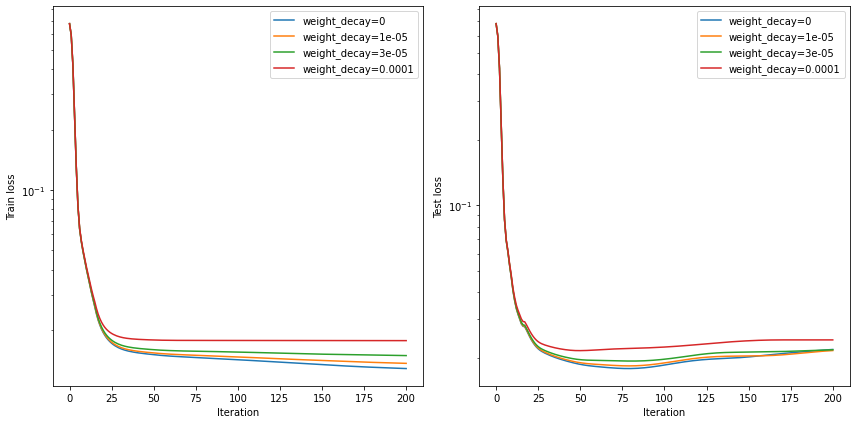

In [64]:
plot_losses(metrics, labels)

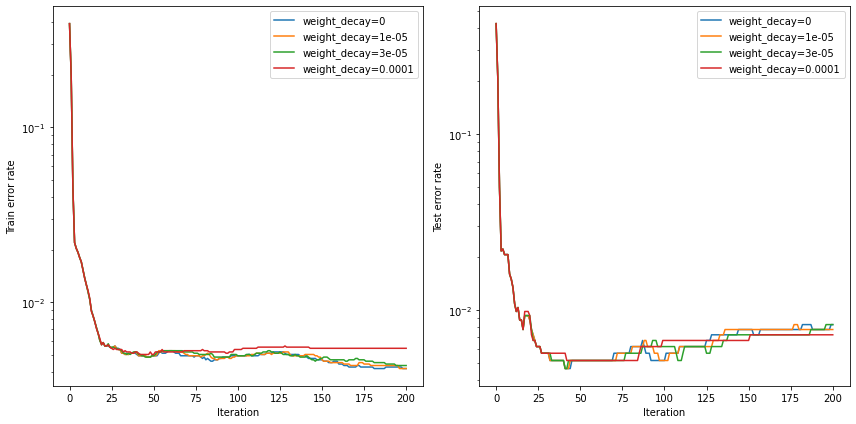

In [65]:
plot_errors(metrics, labels)

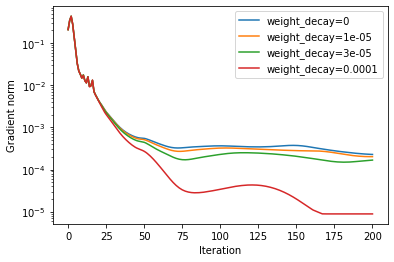

In [66]:
plot_grad_norms(metrics, labels)

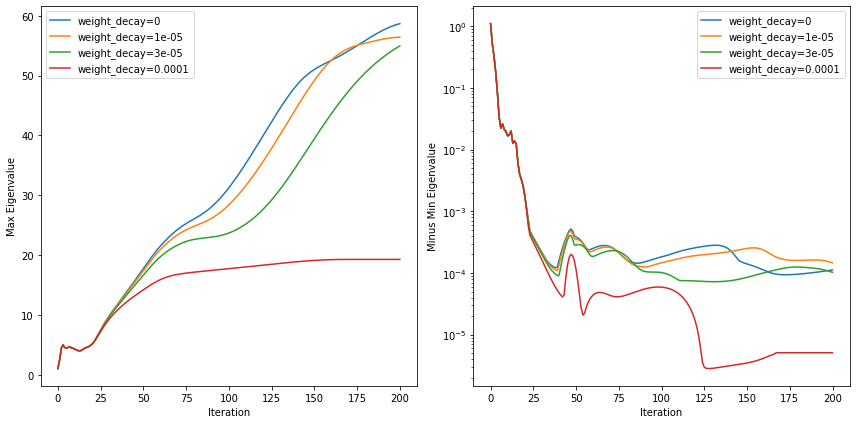

In [67]:
plot_max_min_eigvals(hessian_metrics, labels)

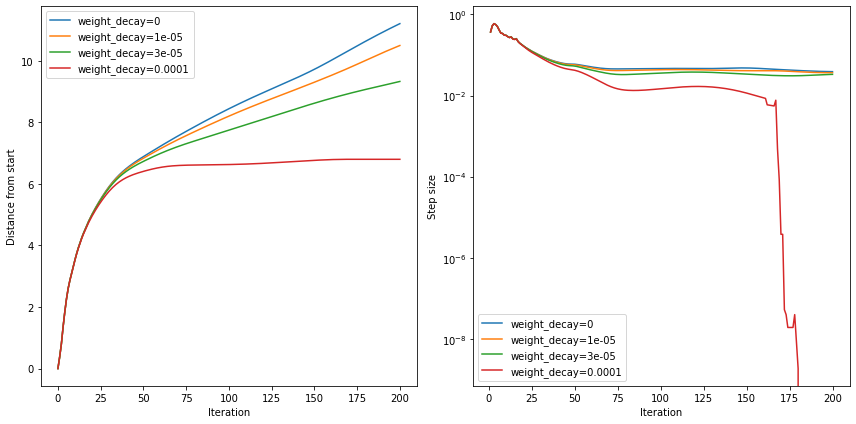

In [68]:
plot_distances(metrics, labels)

# Gradient Descent

In [69]:
GD_trainer = {}

In [75]:
for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    seed = 0
    max_iters = 4000
    print_every = 200
    eval_every = 10
    eval_hessian_every = 50
    save_spectrum_every = None
    save_hessian_every = None
    save_every = max_iters
    # kwargs
    L = 1.0
    L_min = 1e-3

    model_dir = os.path.join(os.path.join(RESULTS_PATH, "GD"), f"seed={seed} L_min={L_min} weight_decay={weight_decay}")
    print(f"model_dir: {model_dir}")

    torch.manual_seed(seed)
    GD_trainer[weight_decay] = AdaptiveGDTrainer(get_net(), get_dataset(), criterion, weight_decay, model_dir, L, L_min)
    GD_trainer[weight_decay].load()
    print_training_stats(GD_trainer[weight_decay], print_every)
    #_ = GD_trainer[weight_decay].train(max_iters, print_every, eval_every, eval_hessian_every, save_spectrum_every, save_hessian_every, save_every)

model_dir: /content/drive/MyDrive/Master Thesis/results/layers=3 tanh + L2 classes=[6,8]/GD/seed=0 L_min=0.001 weight_decay=0
     0: train loss =  0.677507, test loss =  0.682647, L =   1.00000000, time =    0.00 sec, lambda_n = -1.101317
   200: train loss =  0.039345, test loss =  0.040062, L =   1.00000000, time =    1.30 sec, lambda_n = -0.008920
   400: train loss =  0.030922, test loss =  0.026810, L =   2.00000000, time =    2.61 sec, lambda_n = -0.017875
   600: train loss =  0.025461, test loss =  0.024704, L =   2.00000000, time =    3.93 sec, lambda_n = -0.011511
   800: train loss =  0.021804, test loss =  0.025696, L =   4.00000000, time =    5.25 sec, lambda_n = -0.004447
 1,000: train loss =  0.020140, test loss =  0.025628, L =   2.00000000, time =    6.55 sec, lambda_n = -0.004023
 1,200: train loss =  0.018956, test loss =  0.025282, L =   4.00000000, time =    7.86 sec, lambda_n = -0.002053
 1,400: train loss =  0.018074, test loss =  0.024819, L =   2.00000000, tim

In [71]:
print_test_accuracy(GD_trainer[0])

Best test accuracy: 99.38%
Last test accuracy: 99.33%


In [72]:
print_test_accuracy(GD_trainer[1e-5])

Best test accuracy: 99.38%
Last test accuracy: 99.33%


In [73]:
print_test_accuracy(GD_trainer[3e-5])

Best test accuracy: 99.38%
Last test accuracy: 99.33%


In [74]:
print_test_accuracy(GD_trainer[1e-4])

Best test accuracy: 99.38%
Last test accuracy: 99.33%


## plots

In [76]:
metrics = []
hessian_metrics = []
labels = []

for weight_decay in [0, 1e-5, 3e-5, 1e-4]:
    metrics.append(get_metrics(GD_trainer[weight_decay]))
    hessian_metrics.append(get_hessian_metrics(GD_trainer[weight_decay]))
    labels.append(f"weight_decay={weight_decay}")

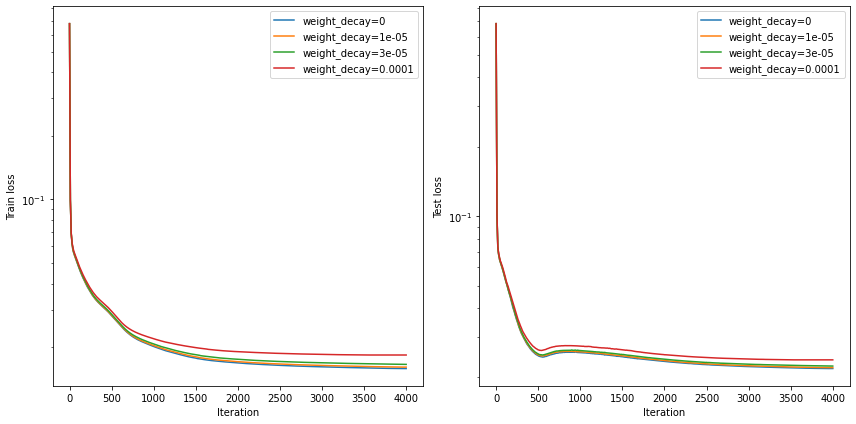

In [77]:
plot_losses(metrics, labels)

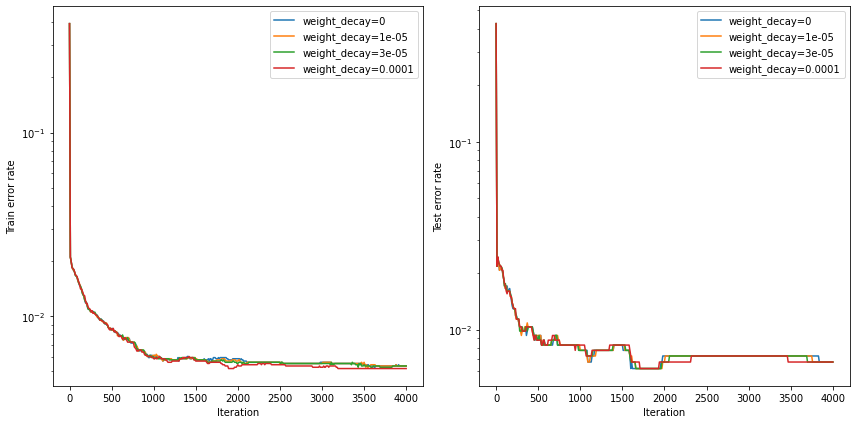

In [78]:
plot_errors(metrics, labels)

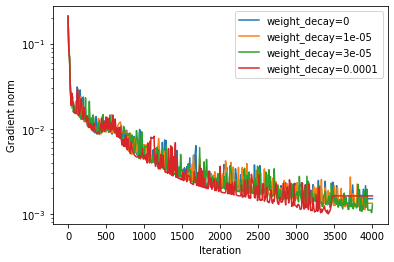

In [79]:
plot_grad_norms(metrics, labels)

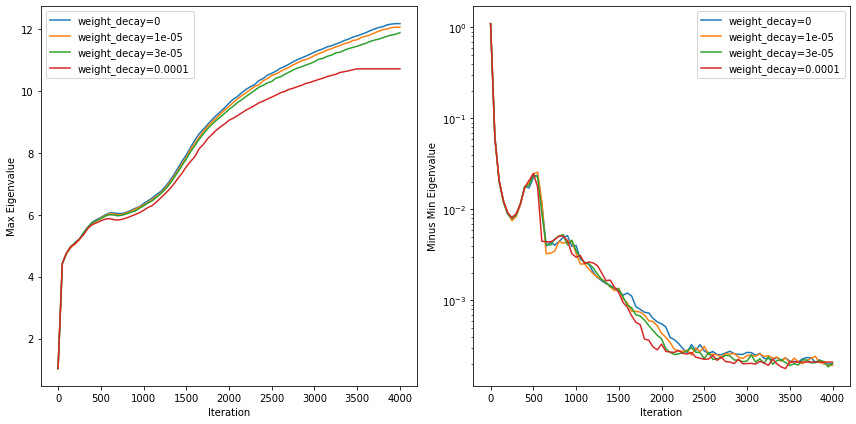

In [80]:
plot_max_min_eigvals(hessian_metrics, labels)

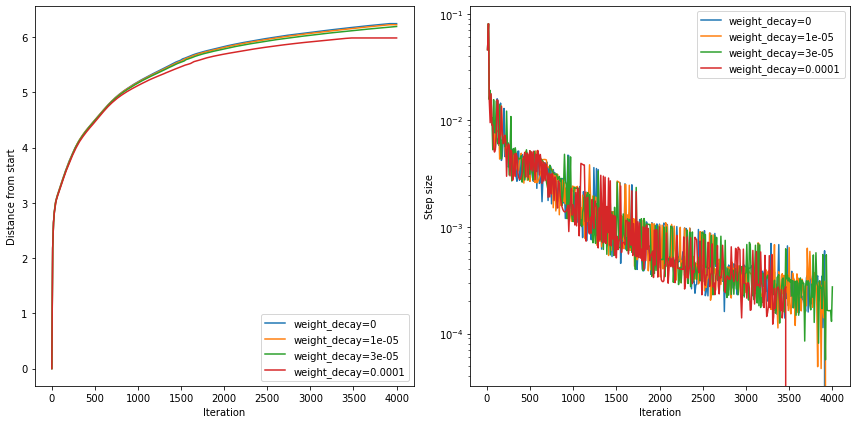

In [81]:
plot_distances(metrics, labels)

# Plots

In [82]:
metrics = [get_metrics(CN_trainer[3e-1][0]), get_metrics(GD_trainer[0])]
hessian_metrics = [get_hessian_metrics(CN_trainer[3e-1][0]), get_hessian_metrics(GD_trainer[0])]
labels = ["CN", "GD"]

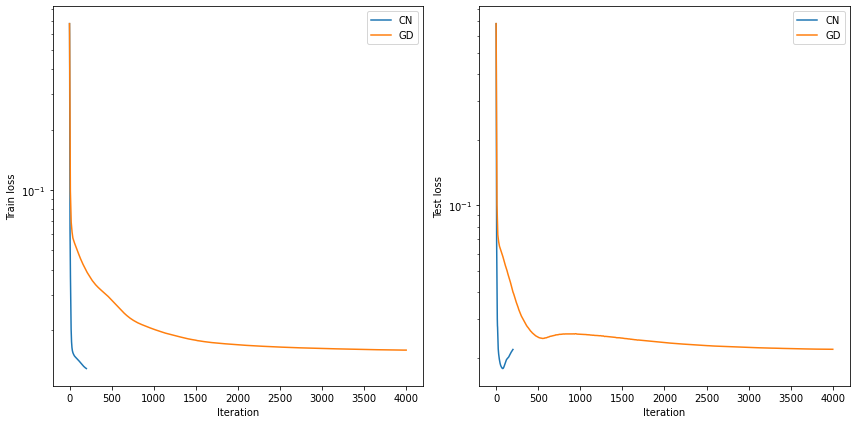

In [83]:
plot_losses(metrics, labels)

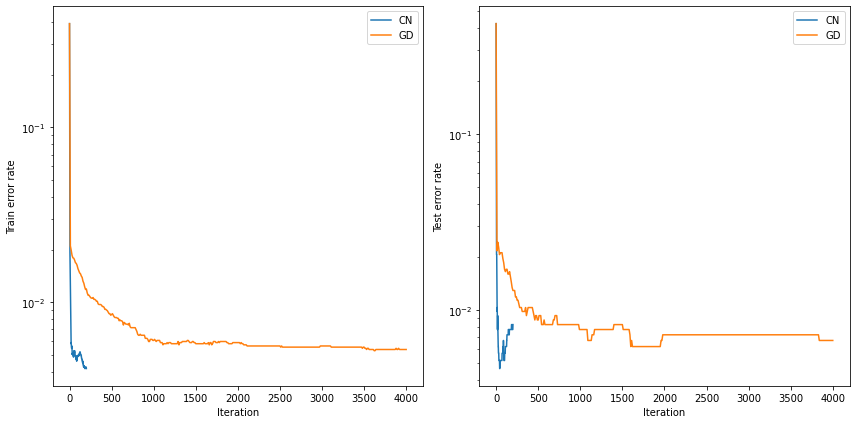

In [84]:
plot_errors(metrics, labels)

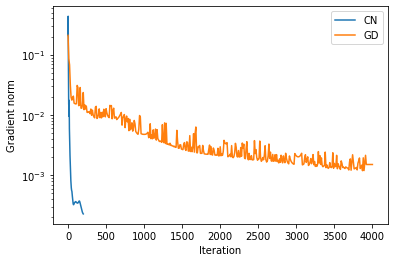

In [85]:
plot_grad_norms(metrics, labels)

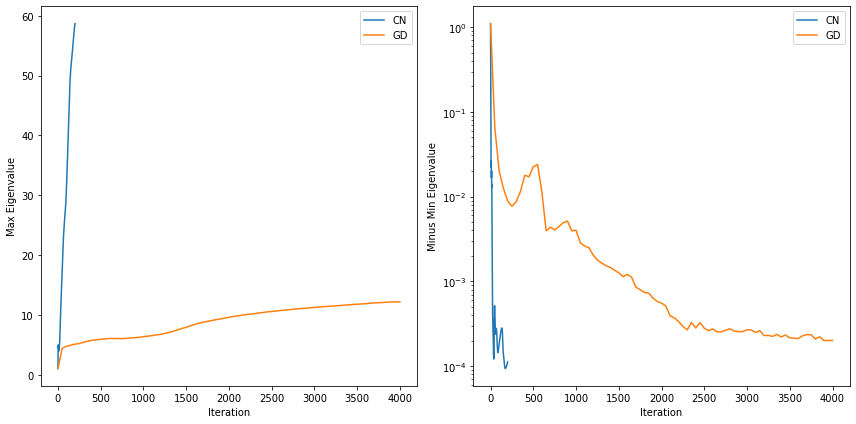

In [86]:
plot_max_min_eigvals(hessian_metrics, labels)

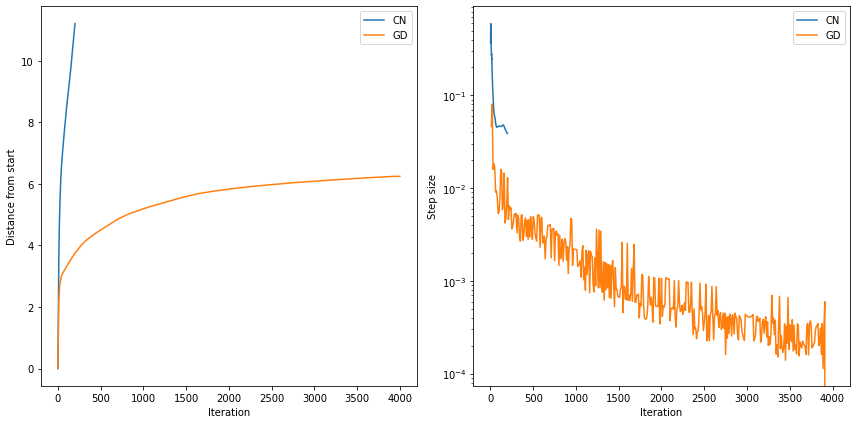

In [87]:
plot_distances(metrics, labels)